In [56]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from model import SVM

In [57]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


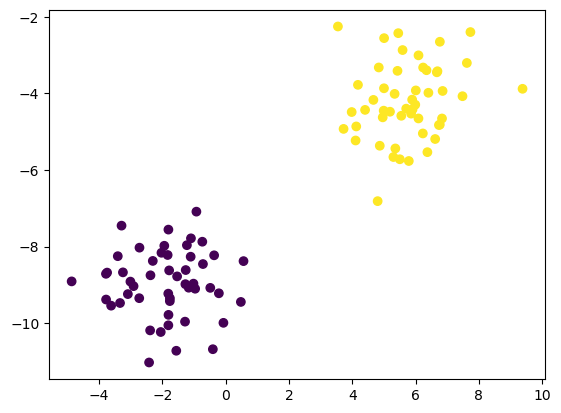

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], marker="o", c=y)

In [59]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [60]:
model = SVM()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy(y_test, y_pred)
print(acc)

1.0


In [61]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

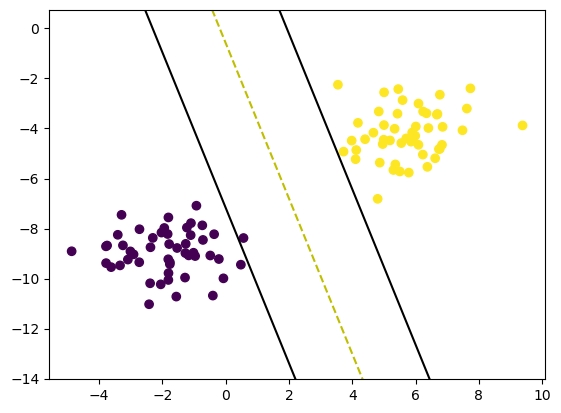

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, model.weight, model.bias, 0)
x1_2 = get_hyperplane_value(x0_2, model.weight, model.bias, 0)

x1_1_m = get_hyperplane_value(x0_1, model.weight, model.bias, -1)
x1_2_m = get_hyperplane_value(x0_2, model.weight, model.bias, -1)

x1_1_p = get_hyperplane_value(x0_1, model.weight, model.bias, 1)
x1_2_p = get_hyperplane_value(x0_2, model.weight, model.bias, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()